In [1]:
import numpy as np
from scipy import linalg
from scipy.optimize import minimize
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
M = np.load('M.npy')

In [3]:
NdotEFV    = pd.read_pickle('RawEFV.pkl')
NdotNG     = pd.read_pickle('RawNG.pkl')
NdotDeM    = pd.read_pickle('RawDeM.pkl')
NdotLeak   = pd.read_pickle('RawLeak.pkl')
NdotMRV    = pd.read_pickle('RawMRV.pkl')
NdotLMR    = pd.read_pickle('RawLMR.pkl')
NdotBleedL = pd.read_pickle('RawBleedL.pkl')
NdotHMR    = pd.read_pickle('RawHMR.pkl')
NdotBleedH = pd.read_pickle('RawBleedH.pkl')
NdotVap    = pd.read_pickle('RawVap.pkl')
NdotLiq    = pd.read_pickle('RawLiq.pkl')

In [4]:
N = NdotEFV.shape[0]
N

19872

In [5]:
y = np.zeros((47,N))
# EFV
y[0] = NdotEFV['C1']
y[1] = NdotEFV['C2']
y[2] = NdotEFV['C3']
y[3] = NdotEFV['C4']
y[4] = NdotEFV['N2']
# NG
y[5] = NdotNG['C1']
y[6] = NdotNG['C2']
y[7] = NdotNG['C3']
y[8] = NdotNG['C4']
y[9] = NdotNG['N2']
# DeM, only C1 allocation here
y[10] = NdotDeM['C1']
# Leak
y[11] = NdotLeak['C1']
y[12] = NdotLeak['C2']
y[13] = NdotLeak['C3']
y[14] = NdotLeak['C4']
y[15] = NdotLeak['N2']
# MRV
y[16] = NdotMRV['C1']
y[17] = NdotMRV['C2']
y[18] = NdotMRV['C3']
y[19] = NdotMRV['C4']
y[20] = NdotMRV['N2']
# LMR
y[21] = NdotLMR['C1']
y[22] = NdotLMR['C2']
y[23] = NdotLMR['C3']
y[24] = NdotLMR['C4']
y[25] = NdotLMR['N2']
# BleedL
y[26] = NdotBleedL['C1']
y[27] = NdotBleedL['C2']
y[28] = NdotBleedL['C3']
y[29] = NdotBleedL['C4']
y[30] = NdotBleedL['N2']
# HMR
y[31] = NdotHMR['C1']
y[32] = NdotHMR['C2']
y[33] = NdotHMR['C3']
y[34] = NdotHMR['C4']
y[35] = NdotHMR['N2']
# BleedH
y[36] = NdotBleedH['C1']
y[37] = NdotBleedH['C2']
y[38] = NdotBleedH['C3']
y[39] = NdotBleedH['C4']
y[40] = NdotBleedH['N2']
# Vap, No C4 allocation here 
y[41] = NdotVap['C1']
y[42] = NdotVap['C2']
y[43] = NdotVap['C3']
y[44] = NdotVap['N2']
# Liq, only C2, C3 allocation here
y[45] = NdotLiq['C2']
y[46] = NdotLiq['C3']

In [6]:
# Store a true copy of raw data for later comparison
yraw = np.array(y, copy=True)
np.save('yraw.npy', yraw)

In [7]:
yraw[:,0]

array([  9.86730924e+02,   4.19586694e+01,   1.91296658e+01,
         8.92735433e+00,   3.79974654e+00,   1.00049557e+03,
         4.29323911e+01,   1.95736019e+01,   9.13452864e+00,
         3.88792607e+00,   8.92694554e+00,  -5.07926374e-01,
        -2.17956925e-02,  -9.93702418e-03,  -4.63736987e-03,
        -1.97380204e-03,   6.46765886e+02,   5.32690792e+02,
         9.76989878e+01,   5.14480061e+00,   7.68630993e+01,
         2.26789228e+02,   5.36437591e+01,   2.77205323e+00,
         5.37087436e-02,   7.08772462e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   3.32969919e+02,   4.97148007e+02,
         1.02371311e+02,   5.45208069e+00,   3.41756927e+01,
         3.79969938e-02,   5.67322411e-02,   1.16821426e-02,
         6.22166341e-04,   3.89997267e-03,   1.95291987e-01,
         2.35591607e-01,   3.15493873e-03,   5.41481597e-02,
         2.99482202e-17,   0.00000000e+00])

In [8]:
y = np.nan_to_num(y) # NaN becomes 0 and Inf becomes large finite number

### Visual Check of Raw Data

In [9]:
# Eq1: DeM + NG = EFV
LHS1_C1 = y[10] + y[5]; RHS1_C1 = y[0]
LHS1_C2 =         y[6]; RHS1_C2 = y[1]
LHS1_C3 =         y[7]; RHS1_C3 = y[2]
LHS1_C4 =         y[8]; RHS1_C4 = y[3]
LHS1_N2 =         y[9]; RHS1_N2 = y[4]

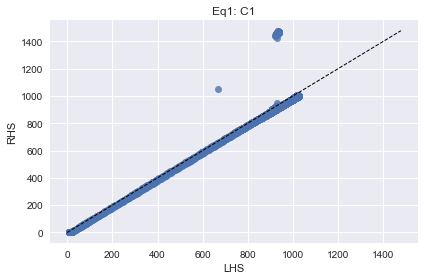

In [10]:
xvec = LHS1_C1
yvec = RHS1_C1
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq1: C1')
plt.tight_layout()
plt.show()

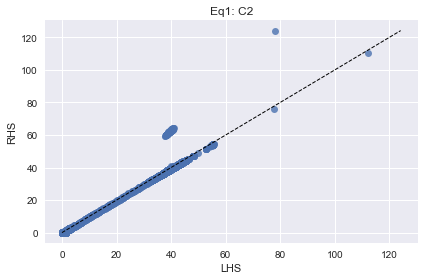

In [11]:
xvec = LHS1_C2
yvec = RHS1_C2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq1: C2')
plt.tight_layout()
plt.show()

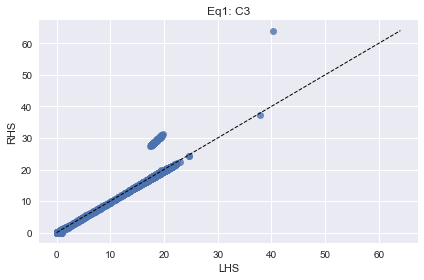

In [12]:
xvec = LHS1_C3
yvec = RHS1_C3
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq1: C3')
plt.tight_layout()
plt.show()

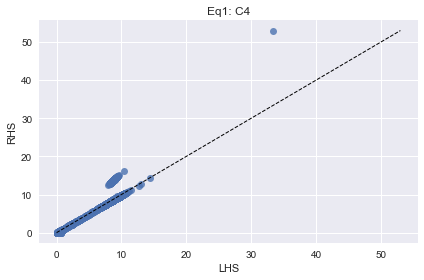

In [13]:
xvec = LHS1_C4
yvec = RHS1_C4
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq1: C4')
plt.tight_layout()
plt.show()

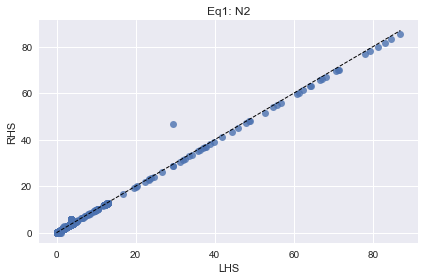

In [14]:
xvec = LHS1_N2
yvec = RHS1_N2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq1: N2')
plt.tight_layout()
plt.show()

In [15]:
# Eq2: Leak + LMR + HMR + Vap = MRV
LHS2_C1 = y[11] + y[21] + y[31] + y[41]; RHS2_C1 = y[16]
LHS2_C2 = y[12] + y[22] + y[32] + y[42]; RHS2_C2 = y[17]
LHS2_C3 = y[13] + y[23] + y[33] + y[43]; RHS2_C3 = y[18]
LHS2_C4 = y[14] + y[24] + y[34]        ; RHS2_C4 = y[19]
LHS2_N2 = y[15] + y[25] + y[35] + y[44]; RHS2_N2 = y[20]

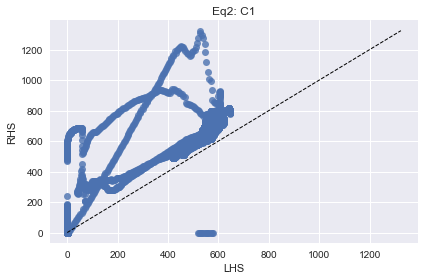

In [16]:
xvec = LHS2_C1
yvec = RHS2_C1
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq2: C1')
plt.tight_layout()
plt.show()

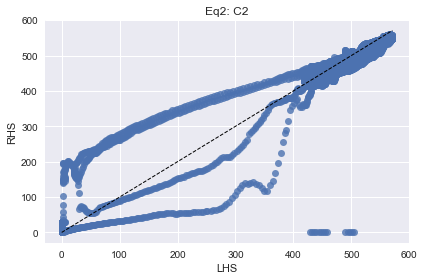

In [17]:
xvec = LHS2_C2
yvec = RHS2_C2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq2: C2')
plt.tight_layout()
plt.show()

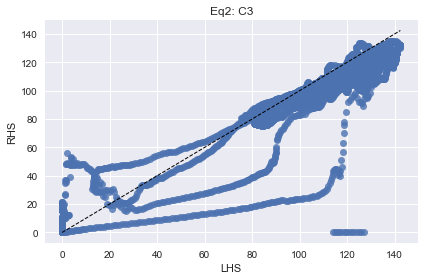

In [18]:
xvec = LHS2_C3
yvec = RHS2_C3
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq2: C3')
plt.tight_layout()
plt.show()

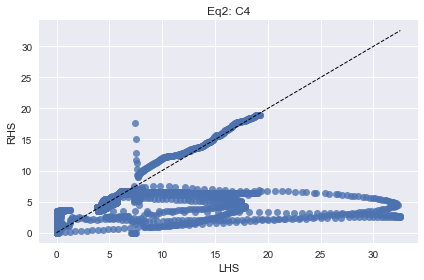

In [19]:
xvec = LHS2_C4
yvec = RHS2_C4
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq2: C4')
plt.tight_layout()
plt.show()

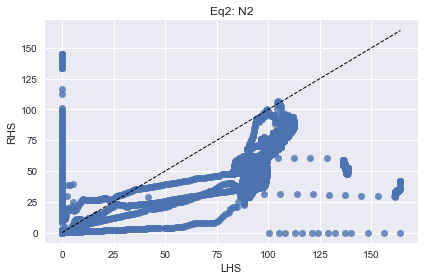

In [20]:
xvec = LHS2_N2
yvec = RHS2_N2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq2: N2')
plt.tight_layout()
plt.show()

In [21]:
# Eq3: MRV + Liq = LMR + BleedL + HMR + BleedH
LHS3_C1 = y[16] ;        RHS3_C1 = y[21] + y[26] + y[31] + y[36]
LHS3_C2 = y[17] + y[45]; RHS3_C2 = y[22] + y[27] + y[32] + y[37]
LHS3_C3 = y[18] + y[46]; RHS3_C3 = y[23] + y[28] + y[33] + y[38]
LHS3_C4 = y[19];         RHS3_C4 = y[24] + y[29] + y[34] + y[39]
LHS3_N2 = y[20];         RHS3_N2 = y[25] + y[30] + y[35] + y[40]

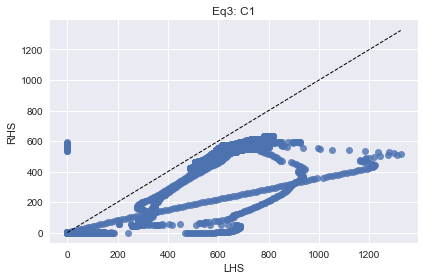

In [22]:
xvec = LHS3_C1
yvec = RHS3_C1
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq3: C1')
plt.tight_layout()
plt.show()

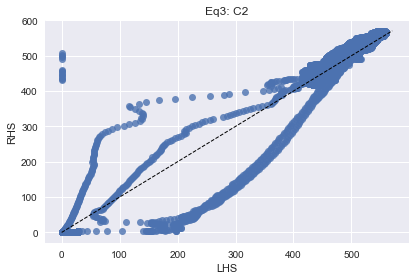

In [23]:
xvec = LHS3_C2
yvec = RHS3_C2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq3: C2')
plt.tight_layout()
plt.show()

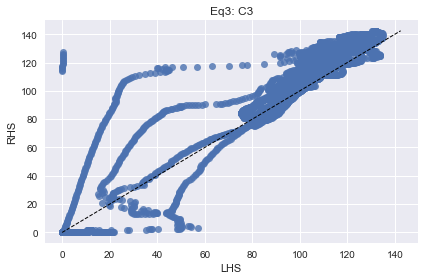

In [24]:
xvec = LHS3_C3
yvec = RHS3_C3
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq3: C3')
plt.tight_layout()
plt.show()

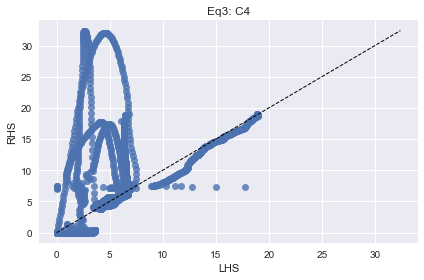

In [25]:
xvec = LHS3_C4
yvec = RHS3_C4
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq3: C4')
plt.tight_layout()
plt.show()

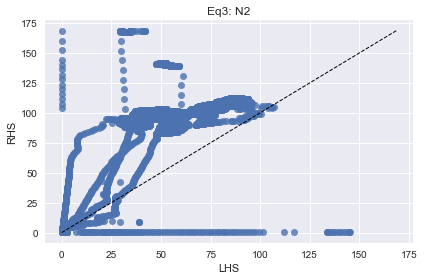

In [26]:
xvec = LHS3_N2
yvec = RHS3_N2
low_val = np.nanmin((np.nanmin(xvec),np.nanmin(yvec)))
high_val = np.nanmax((np.nanmax(xvec),np.nanmax(yvec)))
sns.regplot(xvec,yvec, fit_reg=False)
plt.plot([low_val, high_val],[low_val, high_val], color='k', linestyle='--', linewidth=1)
plt.xlabel('LHS')
plt.ylabel('RHS')
plt.title( 'Eq3: N2')
plt.tight_layout()
plt.show()

### Species constraints matrix

In [27]:
A = np.zeros((15,47))
c=-1;

In [28]:
# Eq1: DeM + NG = EFV
c=c+1; A[c,10]=+1.0; A[c,5]=+1.0; A[c,0] = -1.0
c=c+1;               A[c,6]=+1.0; A[c,1] = -1.0
c=c+1;               A[c,7]=+1.0; A[c,2] = -1.0
c=c+1;               A[c,8]=+1.0; A[c,3] = -1.0
c=c+1;               A[c,9]=+1.0; A[c,4] = -1.0


In [29]:
# Eq2: Leak + LMR + HMR + Vap = MRV
c=c+1; A[c,11]=+1.0; A[c,21]=+1.0; A[c,31]=+1.0; A[c,41]=+1.0; A[c,16]=-1.0; 
c=c+1; A[c,12]=+1.0; A[c,22]=+1.0; A[c,32]=+1.0; A[c,42]=+1.0; A[c,17]=-1.0; 
c=c+1; A[c,13]=+1.0; A[c,23]=+1.0; A[c,33]=+1.0; A[c,43]=+1.0; A[c,18]=-1.0; 
c=c+1; A[c,14]=+1.0; A[c,24]=+1.0; A[c,34]=+1.0;               A[c,19]=-1.0; 
c=c+1; A[c,15]=+1.0; A[c,25]=+1.0; A[c,35]=+1.0; A[c,44]=+1.0; A[c,20]=-1.0; 

In [30]:
# Eq3: MRV + Liq = LMR + BleedL + HMR + BleedH
c=c+1; A[c,16]=+1.0;               A[c,21]=-1.0; A[c,26]=-1.0; A[c,31]=-1.0; A[c,36]=-1.0;
c=c+1; A[c,17]=+1.0; A[c,45]=+1.0; A[c,22]=-1.0; A[c,27]=-1.0; A[c,32]=-1.0; A[c,37]=-1.0;
c=c+1; A[c,18]=+1.0; A[c,46]=+1.0; A[c,23]=-1.0; A[c,28]=-1.0; A[c,33]=-1.0; A[c,38]=-1.0;
c=c+1; A[c,19]=+1.0;               A[c,24]=-1.0; A[c,29]=-1.0; A[c,34]=-1.0; A[c,39]=-1.0;
c=c+1; A[c,20]=+1.0;               A[c,25]=-1.0; A[c,30]=-1.0; A[c,35]=-1.0; A[c,40]=-1.0;

In [31]:
A @ y[:,0]

array([ 22.69159034,   0.97372169,   0.44393616,   0.20717431,
         0.08817953, -87.31937334,  18.31476951,   7.43759462,
         0.35635145,  28.24201398,  86.96874196, -18.15770584,
        -7.45605885,  -0.36161099, -28.19373959])

In [32]:
y.shape

(47, 19872)

### Vectorized theoretical solution satisfying linear equalities and positivity constraints

In [33]:
k = 0
tic = timeit.default_timer()
while True:
    y[y < 0.0] = 1e-8  # Replace negative values by tiny positives
    V = np.diag(np.nanvar(y,axis=1))  
    y = y - V @ A.T @ linalg.pinv(A @ V @ A.T) @ A @ y
    any_var_neg = (np.nanmin(y, axis=1) < 0).sum()
    print(k,any_var_neg)
    if (any_var_neg==0): 
        break
    else:
        k = k + 1
toc = timeit.default_timer()
print('Vectorized solution: Time taken in seconds = ', toc-tic)

0 29
1 28
2 24
3 22
4 23
5 23
6 20
7 20
8 19
9 18
10 18
11 17
12 17
13 17
14 16
15 13
16 12
17 11
18 10
19 10
20 8
21 5
22 4
23 3
24 3
25 3
26 3
27 2
28 2
29 1
30 1
31 1
32 0
Vectorized solution: Time taken in seconds =  6.31738956228438


In [34]:
yrec = np.array(y, copy=True)
np.save('yrec.npy', yrec)

In [35]:
np.column_stack((yraw[:,0],y[:,0]))

array([[  9.86730924e+02,   9.98348183e+02],
       [  4.19586694e+01,   4.24508853e+01],
       [  1.91296658e+01,   1.93547956e+01],
       [  8.92735433e+00,   9.03289372e+00],
       [  3.79974654e+00,   3.84337418e+00],
       [  1.00049557e+03,   9.89424736e+02],
       [  4.29323911e+01,   4.24508853e+01],
       [  1.95736019e+01,   1.93547956e+01],
       [  9.13452864e+00,   9.03289372e+00],
       [  3.88792607e+00,   3.84337418e+00],
       [  8.92694554e+00,   8.92344736e+00],
       [ -5.07926374e-01,   2.66144202e-01],
       [ -2.17956925e-02,   5.37141556e-09],
       [ -9.93702418e-03,   5.36211101e-03],
       [ -4.63736987e-03,   6.21459841e-04],
       [ -1.97380204e-03,   5.16318704e-09],
       [  6.46765886e+02,   5.86319921e+02],
       [  5.32690792e+02,   5.42168092e+02],
       [  9.76989878e+01,   1.01268490e+02],
       [  5.14480061e+00,   5.25890707e+00],
       [  7.68630993e+01,   9.28673599e+01],
       [  2.26789228e+02,   2.35674048e+02],
       [  

In [36]:
#np.nanmax(A @ yraw, axis=1)

In [37]:
np.nanmax(A @ y, axis=1)

array([  1.13686838e-13,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.58262292e-13,
         2.36255460e-13,   5.68017855e-14,   3.55271368e-15,
         2.70894418e-14,   1.54501412e-13,   2.24287019e-13,
         3.61042893e-14,   8.88872309e-15,   2.94417268e-14])

In [38]:
#np.nanmin(yraw, axis=1)

In [39]:
np.nanmin(y, axis=1)

array([  4.91379181e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.70194015e-09,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   9.92270971e-09,   1.10785276e-10,
         2.30416164e-13,   6.95601091e-14,   1.00418086e-08,
         2.71564165e-09,   1.00506018e-01,   5.49601353e-03,
         2.39285004e-03,   6.26972466e-04,   8.15319981e-03,
         9.02788540e-10,   5.31370950e-03,   2.39283850e-03,
         6.26959213e-04,   6.37512963e-03,   2.60037798e-09,
         1.49228064e-10,   1.80427997e-12,   2.23527633e-13,
         5.08783647e-13,   5.33087447e-12,   1.56264342e-10,
         5.66631484e-12,   1.29784267e-11,   6.96003887e-11,
         6.35864556e-10,   9.95983149e-11,   5.55255084e-10,
         3.35753701e-10,   1.66970770e-11,   3.43731027e-11,
         8.03057401e-11,   4.80188024e-12,   1.46086808e-10,
         9.10708441e-14,   1.36303199e-12])

In [40]:
y.shape

(47, 19872)

In [41]:
y[11:16].shape

(5, 19872)

In [42]:
M.shape

(5, 1)

In [43]:
Leak_raw  = M.T @ yraw[11:16]
Leak_theo = M.T @ y[11:16]

In [44]:
(Leak_raw.T).shape

(19872, 1)

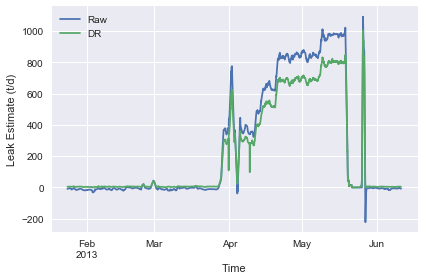

In [45]:
df = pd.DataFrame(np.column_stack([Leak_raw.T, Leak_theo.T]), index=NdotEFV.index, columns=['Raw','DR'])
df.plot()
plt.ylabel('Leak Estimate (t/d)')
plt.tight_layout()
plt.savefig('Leak1.png', dpi = 300)
plt.show()

In [46]:
df.describe()

,Raw,DR
count,19858.000000,19872.000000
mean,264.171093,225.298420
std,374.113293,302.669749
min,-221.796512,0.000001
25%,-8.851517,4.603612
50%,-1.330646,6.357199
75%,625.839381,518.287610
max,1091.981079,1005.989523


In [47]:
df.loc['2013-09-17':'2013-09-20'].resample('D').mean()

,Raw,DR
Time,,


In [48]:
df_daily = df.resample('D').mean()

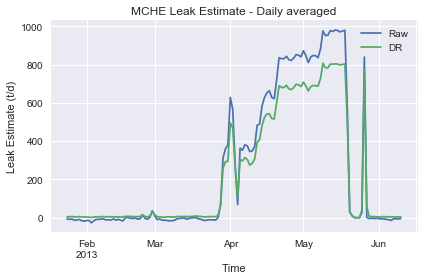

In [49]:
df_daily.plot()
plt.ylabel('Leak Estimate (t/d)')
plt.title('MCHE Leak Estimate - Daily averaged')
plt.tight_layout()
plt.savefig('Leak2.png', dpi = 300)
plt.show()

In [50]:
#df_daily.loc['2013-09-17':'2013-09-20']